<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [5]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.888238,83.688443,52.181875,1471.690366,1691.448922,-402.094415,2093.543337
1,0.0,1.0,76.838729,20.782757,74.525497,178.371292,360.518275,228.403656,132.114619
2,0.0,2.0,52.060749,89.778908,35.596292,-2370.553870,-2183.117922,-167.798730,-2015.319192
3,0.0,3.0,99.464239,88.746584,75.758063,-1843.383188,-1569.414301,-802.037058,-767.377244
4,0.0,4.0,80.522315,20.614141,30.524982,-24.428696,117.232741,152.928375,-35.695634
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,66.460852,40.780639,83.410185,768.852364,969.504040,519.221892,450.282148
29996,999.0,26.0,65.606847,48.894231,67.560403,-377.920221,-185.858739,308.267128,-494.125867
29997,999.0,27.0,38.392964,57.129358,37.420900,274.059386,417.002607,-260.209139,677.211746
29998,999.0,28.0,91.538672,56.184607,63.975913,1471.883241,1693.582433,446.477259,1247.105174


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.888238,83.688443,52.181875,1471.690366,1691.448922,-402.094415,2093.543337
1,0.0,1.0,76.838729,20.782757,74.525497,178.371292,360.518275,228.403656,132.114619
2,0.0,2.0,52.060749,89.778908,35.596292,-2370.553870,-2183.117922,-167.798730,-2015.319192
3,0.0,3.0,99.464239,88.746584,75.758063,-1843.383188,-1569.414301,-802.037058,-767.377244
4,0.0,4.0,80.522315,20.614141,30.524982,-24.428696,117.232741,152.928375,-35.695634
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,66.460852,40.780639,83.410185,768.852364,969.504040,519.221892,450.282148
29996,999.0,26.0,65.606847,48.894231,67.560403,-377.920221,-185.858739,308.267128,-494.125867
29997,999.0,27.0,38.392964,57.129358,37.420900,274.059386,417.002607,-260.209139,677.211746
29998,999.0,28.0,91.538672,56.184607,63.975913,1471.883241,1693.582433,446.477259,1247.105174


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    73.888238  83.688443  ... -402.094415  2093.543337
      1.0    76.838729  20.782757  ...  228.403656   132.114619
      2.0    52.060749  89.778908  ... -167.798730 -2015.319192
      3.0    99.464239  88.746584  ... -802.037058  -767.377244
      4.0    80.522315  20.614141  ...  152.928375   -35.695634
...                ...        ...  ...         ...          ...
999.0 25.0   66.460852  40.780639  ...  519.221892   450.282148
      26.0   65.606847  48.894231  ...  308.267128  -494.125867
      27.0   38.392964  57.129358  ... -260.209139   677.211746
      28.0   91.538672  56.184607  ...  446.477259  1247.105174
      29.0   29.874639  23.705282  ...   -3.481253   216.020556

[30000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    73.888238  83.688443  ... -402.094415  2093.543337
      1.0    76.838729  20.782757  ...  228.403656   132.114619
      2.0    52.060749  89.778908  ... -167.798730 -2015.319192
      3.0    99.464239  88.746584  ... -802.037058  -767.377244
      4.0    80.522315  20.614141  ...  152.928375   -35.695634
...                ...        ...  ...         ...          ...
999.0 25.0   66.460852  40.780639  ...  519.221892   450.282148
      26.0   65.606847  48.894231  ...  308.267128  -494.125867
      27.0   38.392964  57.129358  ... -260.209139   677.211746
      28.0   91.538672  56.184607  ...  446.477259  1247.105174
      29.0   29.874639  23.705282  ...   -3.481253   216.020556

[30000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.888238,83.688443,52.181875,1471.690366,1691.448922,-402.094415,2093.543337
1,0.0,1.0,76.838729,20.782757,74.525497,178.371292,360.518275,228.403656,132.114619
2,0.0,2.0,52.060749,89.778908,35.596292,-2370.553870,-2183.117922,-167.798730,-2015.319192
3,0.0,3.0,99.464239,88.746584,75.758063,-1843.383188,-1569.414301,-802.037058,-767.377244
4,0.0,4.0,80.522315,20.614141,30.524982,-24.428696,117.232741,152.928375,-35.695634
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,66.460852,40.780639,83.410185,768.852364,969.504040,519.221892,450.282148
29996,999.0,26.0,65.606847,48.894231,67.560403,-377.920221,-185.858739,308.267128,-494.125867
29997,999.0,27.0,38.392964,57.129358,37.420900,274.059386,417.002607,-260.209139,677.211746
29998,999.0,28.0,91.538672,56.184607,63.975913,1471.883241,1693.582433,446.477259,1247.105174


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    73.888238  83.688443  ... -402.094415  2093.543337
      1.0    76.838729  20.782757  ...  228.403656   132.114619
      2.0    52.060749  89.778908  ... -167.798730 -2015.319192
      3.0    99.464239  88.746584  ... -802.037058  -767.377244
      4.0    80.522315  20.614141  ...  152.928375   -35.695634
...                ...        ...  ...         ...          ...
999.0 25.0   66.460852  40.780639  ...  519.221892   450.282148
      26.0   65.606847  48.894231  ...  308.267128  -494.125867
      27.0   38.392964  57.129358  ... -260.209139   677.211746
      28.0   91.538672  56.184607  ...  446.477259  1247.105174
      29.0   29.874639  23.705282  ...   -3.481253   216.020556

[30000 rows x 7 columns]

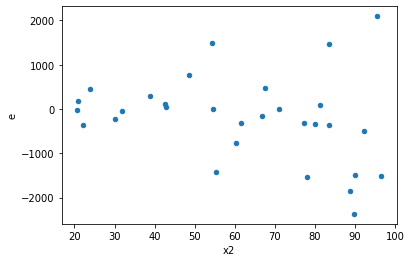

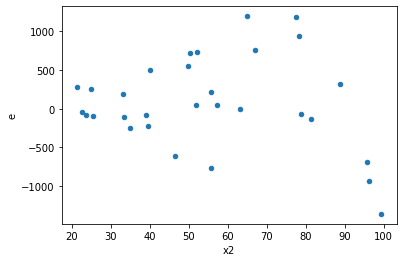

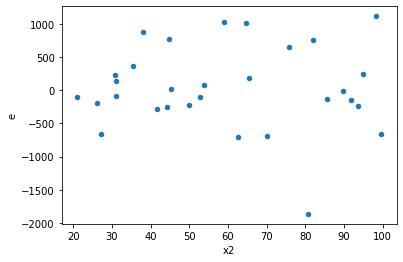

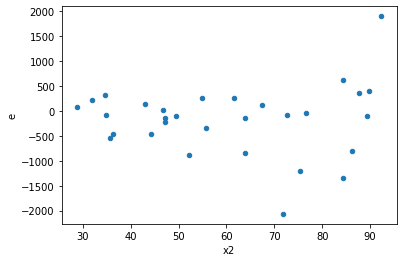

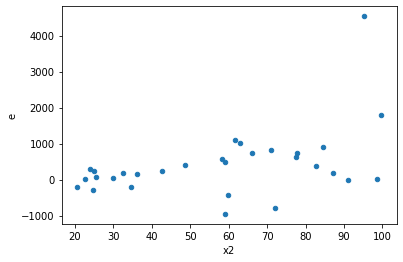

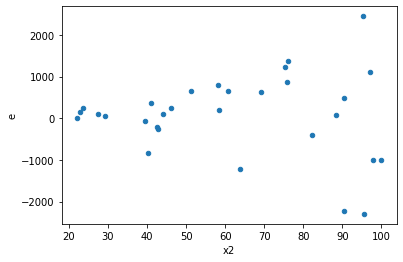

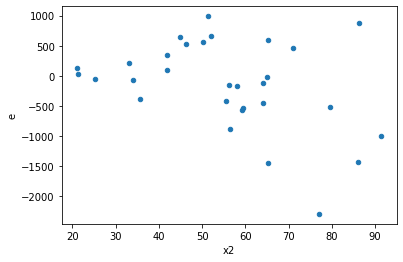

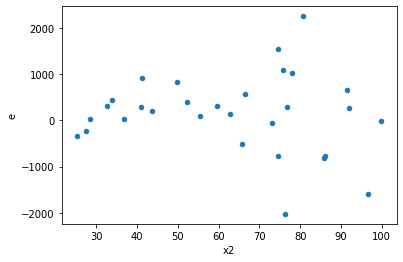

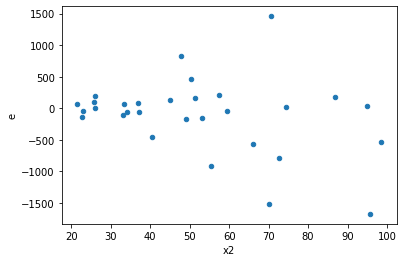

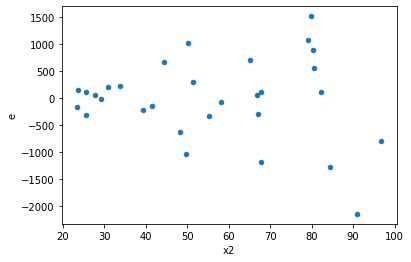

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,1728914.5153606003,15940228.498737037,192101.6128178445,1771136.4998596709,9.219789849131077,0.0028393401199919843,0.998580329940004,0.0014196700599959922,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,613181.904771463,3581917.060492561,68131.32275238477,397990.78449917346,5.841524403476266,0.014841297425802757,0.9925793512870986,0.007420648712901379,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,1600203.0190733254,6682675.557177944,177800.3354525917,742519.506353105,4.176142325395605,0.04464984904434144,0.9776750754778293,0.02232492452217072,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,155472.25254214578,3220541.812656691,17274.694726905087,357837.9791840768,20.71457613816754,0.00011178624527730108,0.9999441068773613,5.589312263865054e-05,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,370876.36302305915,15873199.489903022,41208.4847803399,1763688.832211447,42.79916724948069,5.091122499356615e-06,0.9999974544387503,2.5455612496783075e-06,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,970304.0244107791,20227642.489447817,107811.55826786434,2247515.8321608687,20.846705754653687,0.00010886576058699582,0.9999455671197065,5.443288029349791e-05,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,659807.195067074,8147178.100112485,73311.91056300822,905242.0111236094,12.34781639397592,0.0009158638303590205,0.9995420680848205,0.00045793191517951026,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,402200.1975061631,14876706.656811854,44688.91083401812,1652967.4063124282,36.98831265885664,9.562255169015543e-06,0.9999952188724155,4.781127584507772e-06,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,230739.70697212062,7376164.098240718,25637.745219124514,819573.7886934131,31.967467563491148,1.788572838101743e-05,0.9999910571358095,8.942864190508715e-06,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1728914.5153606003,15940228.498737037,192101.6128178445,1771136.4998596709,9.219789849131077,0.0028393401199919843,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,613181.904771463,3581917.060492561,68131.32275238477,397990.78449917346,5.841524403476266,0.014841297425802757,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,1600203.0190733254,6682675.557177944,177800.3354525917,742519.506353105,4.176142325395605,0.04464984904434144,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,155472.25254214578,3220541.812656691,17274.694726905087,357837.9791840768,20.71457613816754,0.00011178624527730108,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,370876.36302305915,15873199.489903022,41208.4847803399,1763688.832211447,42.79916724948069,5.091122499356615e-06,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,970304.0244107791,20227642.489447817,107811.55826786434,2247515.8321608687,20.846705754653687,0.00010886576058699582,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,659807.195067074,8147178.100112485,73311.91056300822,905242.0111236094,12.34781639397592,0.0009158638303590205,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,402200.1975061631,14876706.656811854,44688.91083401812,1652967.4063124282,36.98831265885664,9.562255169015543e-06,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,230739.70697212062,7376164.098240718,25637.745219124514,819573.7886934131,31.967467563491148,1.788572838101743e-05,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    765
Reject001=1 : Homoscedasticity      235
Name: Result_test, dtype: int64